# Analysis of IMAGEN's questionnaires:
1. Demographics
2. Substance use
3. Psychological assessments
4. Socio-economic status

Reference documentation links:
* IMAGEN's native documentation: https://imagen-europe.com/resources/imagen-dataset/documentation/
* Our local documentation: https://github.com/ritterlab/deepMRI/wiki/IMAGEN
* Their github repositories: https://github.com/imagen2
* Evert's thesis: https://github.com/evertdeman/imagen_thesis
* Latest IMAGEN publications: https://imagen-europe.com/resources/publications/

In [262]:
%load_ext autoreload
%autoreload 2

import os, sys
from glob import glob 
from os.path import join

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set(style="darkgrid", color_codes=False)

from tqdm.notebook import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [263]:
# the analysis timepoint (timepoint of imaging data X) to look into 
TP = "FU3" # "FU2", "BL"  

### load the variable to control

#### variable 1

In [264]:
# for example, I will load the childhood abuse denial question from the Childhood Trauma questionnaire 
INSTRU_QUESTIONNAIRE="CGT"
INSTRU_QUESTION="CGT Risk adjustment"

# a unique name for the instrument to save filenames 
from slugify import slugify

INSTRU_NAME = slugify(INSTRU_QUESTIONNAIRE +'_'+ INSTRU_QUESTION)
print("Variable controlling for::", INSTRU_NAME.title()+"_"+TP)

instrument_df = pd.read_csv(f"/ritter/share/data/IMAGEN/posthoc/all_{INSTRU_QUESTIONNAIRE}.csv").set_index('ID')

    # select FU3 if available or else FU2 or else BL
#if 'FU3' in instrument_df['Session'].unique():
#    instrument_df = instrument_df.groupby('Session').get_group('FU3')
#elif 'FU2' in instrument_df['Session'].unique():
#    instrument_df = instrument_df.groupby('Session').get_group('FU2')
#else:
#    instrument_df = instrument_df.groupby('Session').get_group('BL')

if TP == "FU3":
    instrument_df = instrument_df.groupby('Session').get_group('FU3')
elif TP == "FU2":
    instrument_df = instrument_df.groupby('Session').get_group('FU2')
elif TP == "FU1":
    instrument_df = instrument_df.groupby('Session').get_group('FU1')
elif TP == "BL":
    instrument_df = instrument_df.groupby('Session').get_group('BL')

Variable controlling for:: Cgt-Cgt-Risk-Adjustment_FU3


In [265]:
# get median for binarization
instrument_df[INSTRU_QUESTION].median()

2.0038934426

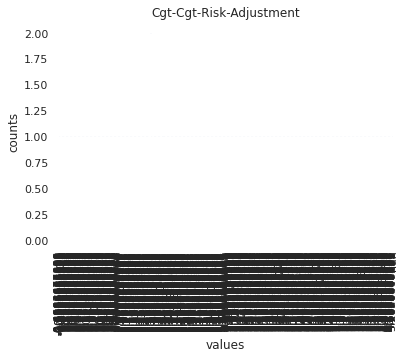

In [266]:
instrument_df = instrument_df[INSTRU_QUESTION]
instrument_df.value_counts(dropna=False).sort_index().plot.bar(title=INSTRU_NAME.title(), xlabel='values', ylabel='counts')
plt.show()
# for help with other questionnaires, refer to the imagen_SS_roshan.ipynb notebook

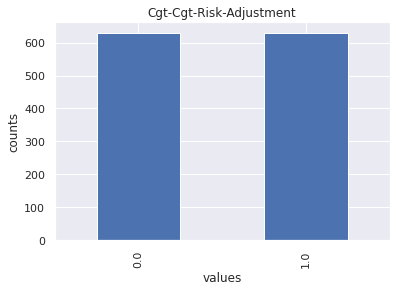

In [267]:
# binarize or further categorize the question?
instrument = instrument_df.copy()
instrument[instrument_df<2] =  0
instrument[instrument_df>=2] = 1

instrument = instrument.fillna(method='ffill')

instrument.value_counts(dropna=False).sort_index().plot.bar(title=INSTRU_NAME.title(), xlabel='values', ylabel='counts')

plt.show()

#### variable 2

In [268]:
INSTRU_QUESTIONNAIRE_2="CGT"
INSTRU_QUESTION_2="CGT Overall proportion bet"

# a unique name for the instrument to save filenames 
from slugify import slugify
INSTRU_NAME_2 = slugify(INSTRU_QUESTIONNAIRE_2 +'_'+ INSTRU_QUESTION_2.split(" ")[0])
print("Variable controlling for::", INSTRU_NAME_2.title()+"_"+TP)

instrument_df_2 = pd.read_csv(f"/ritter/share/data/IMAGEN/posthoc/all_{INSTRU_QUESTIONNAIRE_2}.csv").set_index('ID')

# select FU3 if available or else FU2 or else BL
#if 'FU3' in instrument_df_2['Session'].unique():
#    instrument_df_2 = instrument_df_2.groupby('Session').get_group('FU3')
#elif 'FU2' in instrument_df['Session'].unique():
#    instrument_df_2 = instrument_df_2.groupby('Session').get_group('FU2')
#else:
#    instrument_df_2 = instrument_df_2.groupby('Session').get_group('BL')
    
if TP == "FU3":
    instrument_df_2 = instrument_df_2.groupby('Session').get_group('FU3')
elif TP == "FU2":
    instrument_df_2 = instrument_df_2.groupby('Session').get_group('FU2')
elif TP == "FU1":
    instrument_df_2 = instrument_df_2.groupby('Session').get_group('FU1')
elif TP == "BL":
    instrument_df_2 = instrument_df_2.groupby('Session').get_group('BL')

Variable controlling for:: Cgt-Cgt_FU3


In [269]:
# get median for binarization
instrument_df_2[INSTRU_QUESTION_2].median()

0.5208333333

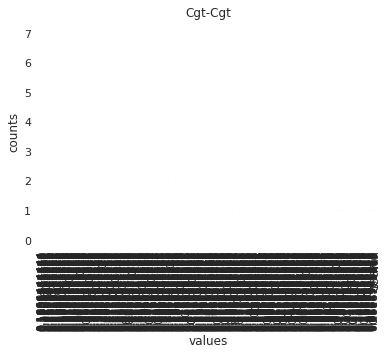

In [270]:
instrument_df_2 = instrument_df_2[INSTRU_QUESTION_2]
instrument_df_2.value_counts(dropna=False).sort_index().plot.bar(title=INSTRU_NAME_2.title(), xlabel='values', ylabel='counts')
plt.show()

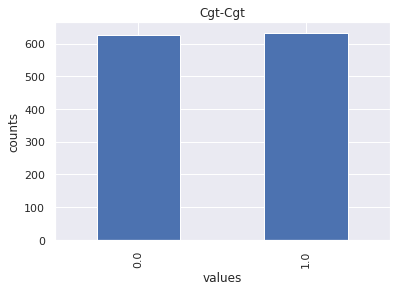

In [271]:
# binarize or further categorize the question?
instrument_2 = instrument_df_2.copy()
instrument_2[instrument_df_2<0.52] =  0
instrument_2[instrument_df_2>=0.52] = 1

instrument_2 = instrument_2.fillna(method='ffill')

instrument_2.value_counts(dropna=False).sort_index().plot.bar(title=INSTRU_NAME_2.title(), xlabel='values', ylabel='counts')


plt.show()


#### variable 3

In [272]:
INSTRU_QUESTIONNAIRE_3="ESPAD_SubAbuse"
INSTRU_QUESTION_3="Total"

# a unique name for the instrument to save filenames 
from slugify import slugify
INSTRU_NAME_3 = slugify(INSTRU_QUESTIONNAIRE_3 +'_'+ INSTRU_QUESTION_3.split(" ")[0])
print("Variable controlling for::", INSTRU_NAME_3.title()+"_"+TP)

instrument_df_3 = pd.read_csv(f"/ritter/share/data/IMAGEN/posthoc/all_{INSTRU_QUESTIONNAIRE_3}.csv").set_index('ID')

# select FU3 if available or else FU2 or else BL
#if 'FU3' in instrument_df_2['Session'].unique():
#    instrument_df_2 = instrument_df_2.groupby('Session').get_group('FU3')
#elif 'FU2' in instrument_df['Session'].unique():
#    instrument_df_2 = instrument_df_2.groupby('Session').get_group('FU2')
#else:
#    instrument_df_2 = instrument_df_2.groupby('Session').get_group('BL')
    
if TP == "FU3":
    instrument_df_3 = instrument_df_3.groupby('Session').get_group('FU3')
elif TP == "FU2":
    instrument_df_3 = instrument_df_3.groupby('Session').get_group('FU2')
elif TP == "FU1":
    instrument_df_3 = instrument_df_3.groupby('Session').get_group('FU1')
elif TP == "BL":
    instrument_df_3 = instrument_df_3.groupby('Session').get_group('BL')

Variable controlling for:: Espad-Subabuse-Total_FU3


In [273]:
# get median for binarization
instrument_df_3[INSTRU_QUESTION_3].median()

0.0

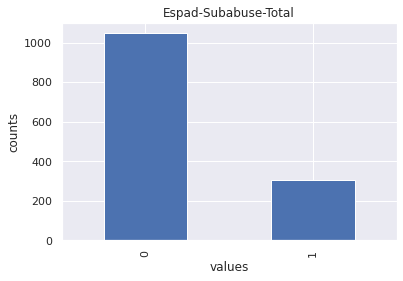

In [274]:
instrument_df_3 = instrument_df_3[INSTRU_QUESTION_3]
instrument_df_3.value_counts(dropna=False).sort_index().plot.bar(title=INSTRU_NAME_3.title(), xlabel='values', ylabel='counts')
plt.show()

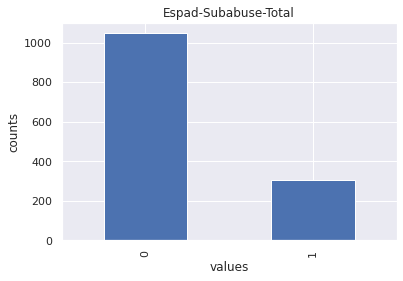

In [275]:
# binarize or further categorize the question?
instrument_3 = instrument_df_3.copy()
instrument_3[instrument_df_3<=0] =  0
instrument_3[instrument_df_3>0] = 1
instrument_3.value_counts(dropna=False).sort_index().plot.bar(title=INSTRU_NAME_3.title(), xlabel='values', ylabel='counts')

plt.show()

#### Combined score

Variable controlling for:: Cgt-Cgt-Risk-Adjustment-Cgt-Cgt-Espad-Subabuse-Total_FU3


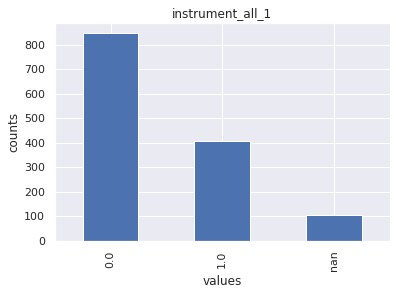

In [276]:
from slugify import slugify
INSTRU_NAME_all = slugify(INSTRU_NAME +'_'+ INSTRU_NAME_2 +'_'+ INSTRU_NAME_3.split(" ")[0])
print("Variable controlling for::", INSTRU_NAME_all.title()+"_"+TP)

instrument_all_1 = instrument + instrument_2 + instrument_3
instrument_all_1[instrument_all_1<=1] =  0
instrument_all_1[instrument_all_1>1] = 1
instrument_all_1

instrument_all_1.value_counts(dropna=False).sort_index().plot.bar(title='instrument_all_1', xlabel='values', ylabel='counts')

plt.show()

### Create the H5 with the label (Binge drinkers vs controls) and the 2 confounds (sex and site)

In [244]:
# import the data loader
sys.path.append("../")
from imagen_dataloader import *

In [245]:
VIZ=True

imagen = Imagen()
# plot the demographics in the present IMAGEN dataset
# imagen.plot_demographics()

##### add instrument 1

In [246]:
# add the first instrument as a confound variable
imagen.df.loc[:, (TP,INSTRU_NAME)] = instrument
# for subjects missing this data, impute the value with the majority class. This is a temporary workaround but may not hold as true, of course.
imagen.df.loc[:, (TP,INSTRU_NAME)] = imagen.df.loc[:, (TP,INSTRU_NAME)].fillna(method='ffill')
# imagen.df.columns

##### add instrument 2

In [247]:
# add the second instrument as a confound variable
imagen.df.loc[:, (TP,INSTRU_NAME_2)] = instrument_2
# for subjects missing this data, impute the value with the majority class. This is a temporary workaround but may not hold as true, of course.
imagen.df.loc[:, (TP,INSTRU_NAME_2)] = imagen.df.loc[:, (TP,INSTRU_NAME_2)].fillna(method='ffill')
# imagen.df.columns

##### add instrument 3

In [248]:
# add the second instrument as a confound variable
imagen.df.loc[:, (TP,INSTRU_NAME_3)] = instrument_3
# for subjects missing this data, impute the value with the majority class. This is a temporary workaround but may not hold as true, of course.
imagen.df.loc[:, (TP,INSTRU_NAME_3)] = imagen.df.loc[:, (TP,INSTRU_NAME_3)].fillna(0)
# imagen.df.columns

##### OR add overall score

In [139]:
# add the combined instrument score as a confound variable
imagen.df.loc[:, (TP,INSTRU_NAME_all)] = instrument_all_1
# for subjects missing this data, impute the value with the majority class. This is a temporary workaround but may not hold as true, of course.
imagen.df.loc[:, (TP,INSTRU_NAME_all)] = imagen.df.loc[:, (TP,INSTRU_NAME_all)].fillna(0)
# imagen.df.columns

#### load binge drinking label

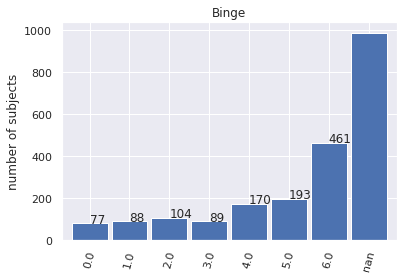

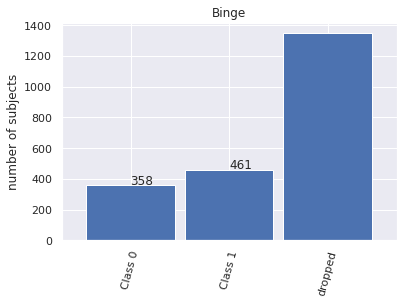

In [249]:
# load the 'Binge drinking' label from ESPAD questionnaire's 19a question
LBL_QUESTIONNAIRE="ESPAD_FU3"
LBL_QUESTION="19a"
LABEL_NAME = 'Binge'

dfq = pd.read_csv(qs[LBL_QUESTIONNAIRE], usecols=["User code", LBL_QUESTION], dtype={"User code":str})
dfq["ID"] = dfq["User code"].str.replace("-C", "").replace("-I", "").astype(int)
dfq = dfq.drop("User code", axis=1)
_= imagen.load_label(dfq, col=LBL_QUESTION,  viz=VIZ, binarize=True, class0=3, class1=6, y_colname=LABEL_NAME)

##### create h5 for 1 instrument

Safe users            353
Moderate misusers    1168
Heavy misusers        437
Name: Binge, dtype: int64
Final dataframe prepared. 
Total subjects = 620
Distributions in final dataframe:


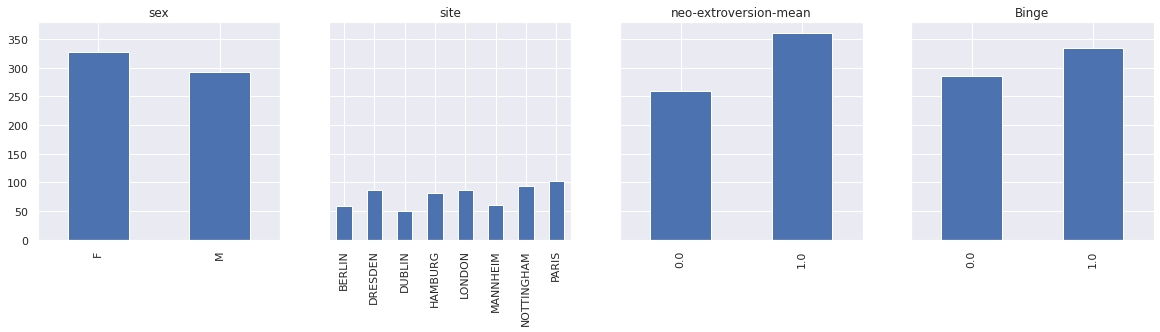

Total subjects = 620


In [88]:
# create the hdf5 file and plot the distributions in the final h5 file generated
imagen.prepare_X(TP, confs=['sex', 'site', INSTRU_NAME], viz=VIZ) 
imagen.hdf5_name_x = 'posthoc-cc-'

##### OR create h5 for 2 instruments

Safe users        282
Heavy misusers    368
Name: Binge, dtype: int64
Final dataframe prepared. 
Total subjects = 650
Distributions in final dataframe:


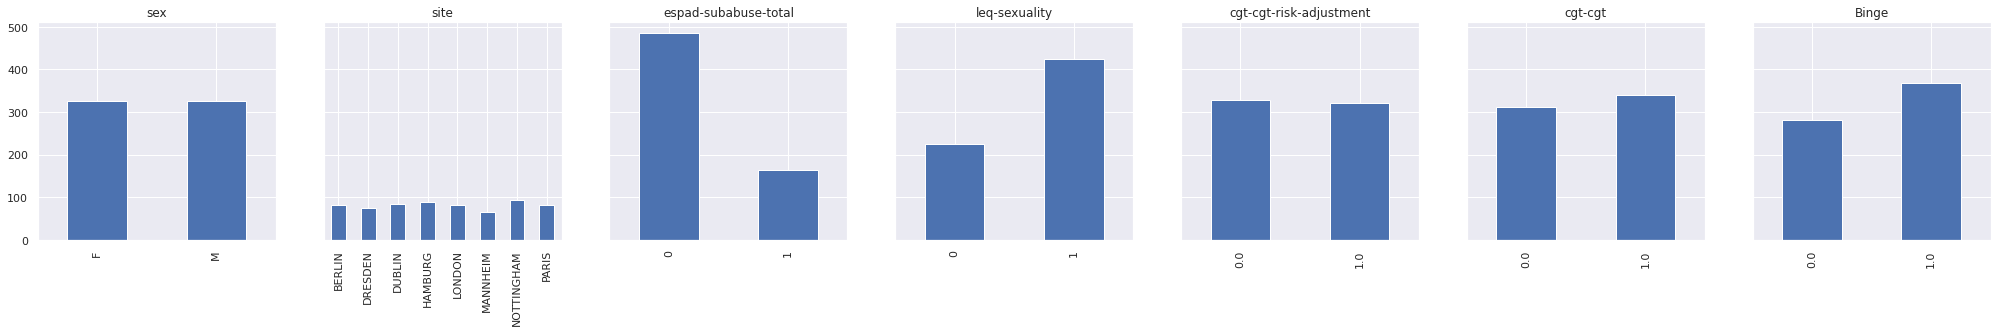

Total subjects = 650


In [240]:
# 2 instruments
# create the hdf5 file and plot the distributions in the final h5 file generated
imagen.prepare_X(TP, confs=['sex', 'site', INSTRU_NAME, INSTRU_NAME_2], viz=VIZ) 
imagen.hdf5_name_x = 'posthoc-cc-'

##### OR create h5 for 3 instruments

Safe users           299
Moderate misusers    336
Heavy misusers       400
Name: Binge, dtype: int64
Final dataframe prepared. 
Total subjects = 650
Distributions in final dataframe:


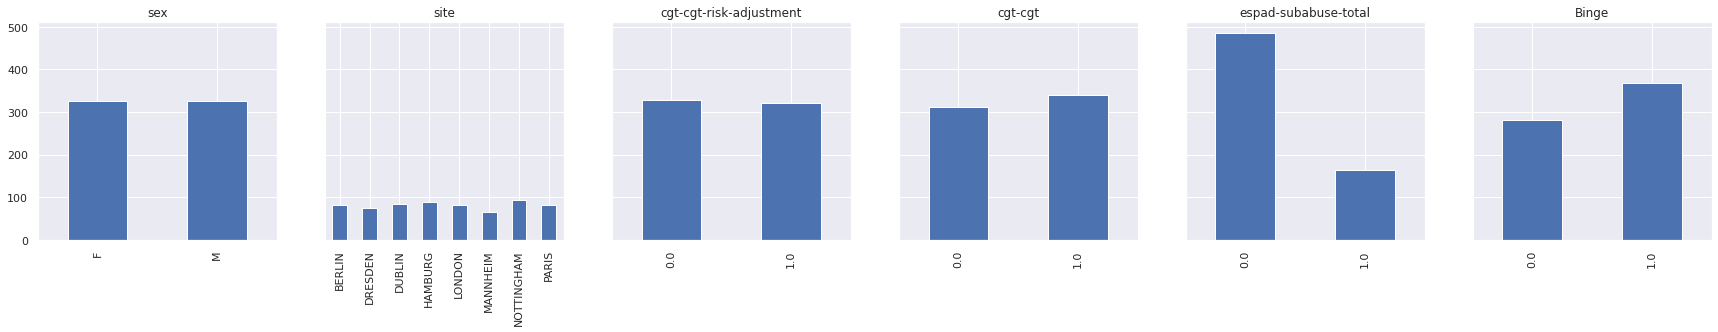

Total subjects = 650


In [250]:
# 3 instruments
# create the hdf5 file and plot the distributions in the final h5 file generated
imagen.prepare_X(TP, confs=['sex', 'site', INSTRU_NAME, INSTRU_NAME_2, INSTRU_NAME_3], viz=VIZ) 
imagen.hdf5_name_x = 'posthoc-cc-'

##### OR create h5 for overall score

Safe users           299
Moderate misusers    336
Heavy misusers       400
Name: Binge, dtype: int64
Final dataframe prepared. 
Total subjects = 650
Distributions in final dataframe:


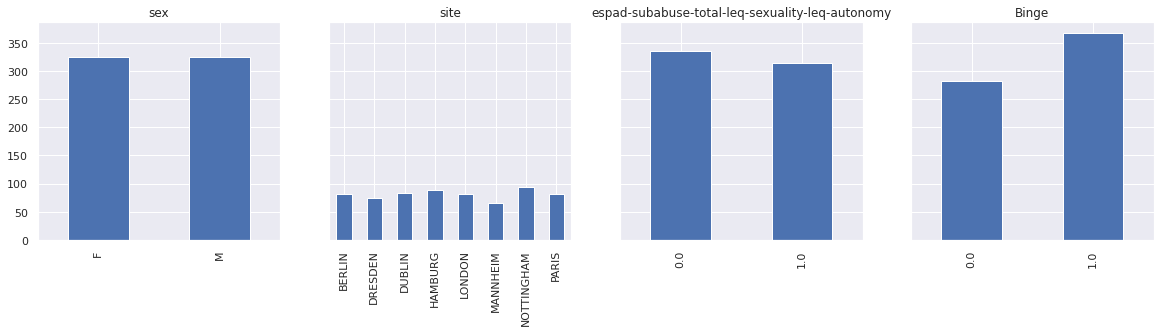

Total subjects = 650


In [141]:
# 3 instruments
# create the hdf5 file and plot the distributions in the final h5 file generated
imagen.prepare_X(TP, confs=['sex', 'site', INSTRU_NAME_all], viz=VIZ) 
imagen.hdf5_name_x = 'posthoc-cc-'

#### Plot distributions

<AxesSubplot:xlabel='Binge'>

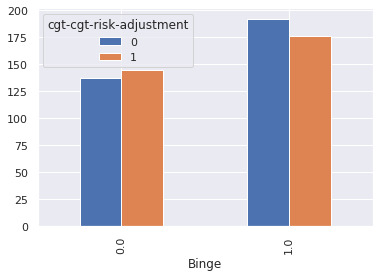

In [251]:
# the variable's distribution per class for instrument 1
imagen.df_out[[LABEL_NAME, INSTRU_NAME]].value_counts().unstack().plot.bar()

<AxesSubplot:xlabel='Binge'>

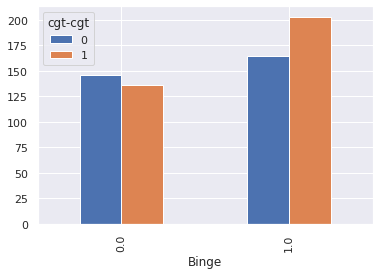

In [252]:
# the variable's distribution per class for instrument 2
imagen.df_out[[LABEL_NAME, INSTRU_NAME_2]].value_counts().unstack().plot.bar()

<AxesSubplot:xlabel='Binge'>

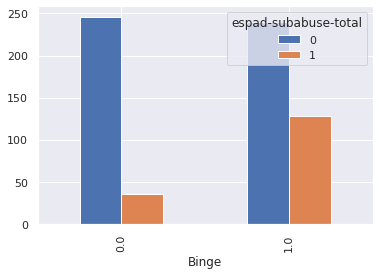

In [253]:
# the variable's distribution per class for instrument 3
imagen.df_out[[LABEL_NAME, INSTRU_NAME_3]].value_counts().unstack().plot.bar()

In [200]:
# the variable's distribution per class for overall score
imagen.df_out[[LABEL_NAME, INSTRU_NAME_all]].value_counts().unstack().plot.bar()

KeyError: "['espad-subabuse-total-leq-sexuality-leq-autonomy'] not in index"

#### Save

##### 1 instrument

In [90]:
# 1 instrument only
# save the h5 file you created
# give a unique suffix to it's name
imagen.hdf5_name_y = TP.lower()+'-'+INSTRU_NAME
imagen.save_h5()

saving h5 file at /ritter/share/data/IMAGEN/h5files/posthoc-cc-bl-neo-extroversion-mean-n620.h5


##### OR 2 instruments

In [243]:
# 2 instruments
# save the h5 file you created
# give a unique suffix to it's name
imagen.hdf5_name_y = TP.lower()+'-'+INSTRU_NAME+'-'+INSTRU_NAME_2
imagen.save_h5()

saving h5 file at /ritter/share/data/IMAGEN/h5files/posthoc-cc-fu3-cgt-cgt-risk-adjustment-cgt-cgt-n650.h5


KeyError: "None of [Index(['T1w_cor_bankssts-lh-volume)',\n       'T1w_cor_caudalanteriorcingulate-lh-volume)',\n       'T1w_cor_caudalmiddlefrontal-lh-volume)', 'T1w_cor_cuneus-lh-volume)',\n       'T1w_cor_entorhinal-lh-volume)', 'T1w_cor_fusiform-lh-volume)',\n       'T1w_cor_inferiorparietal-lh-volume)',\n       'T1w_cor_inferiortemporal-lh-volume)',\n       'T1w_cor_isthmuscingulate-lh-volume)',\n       'T1w_cor_lateraloccipital-lh-volume)',\n       ...\n       'DTI_SFO-R_Average', 'DTI_SLF_Average', 'DTI_SLF-L_Average',\n       'DTI_SLF-R_Average', 'DTI_SS_Average', 'DTI_SS-L_Average',\n       'DTI_SS-R_Average', 'DTI_UNC_Average', 'DTI_UNC-L_Average',\n       'DTI_UNC-R_Average'],\n      dtype='object', length=719)] are in the [columns]"

##### OR 3 instruments

In [254]:
# 3 instruments
# save the h5 file you created
# give a unique suffix to it's name
imagen.hdf5_name_y = TP.lower()+'-'+INSTRU_NAME+'-'+INSTRU_NAME_2+'-'+INSTRU_NAME_3
imagen.save_h5()

saving h5 file at /ritter/share/data/IMAGEN/h5files/posthoc-cc-fu3-cgt-cgt-risk-adjustment-cgt-cgt-espad-subabuse-total-n650.h5


##### OR overall score

In [146]:
# save the h5 file you created
# give a unique suffix to it's name
imagen.hdf5_name_y = TP.lower()+'-combined-'+INSTRU_NAME_all
imagen.save_h5()

saving h5 file at /ritter/share/data/IMAGEN/h5files/posthoc-cc-fu3-combined-espad-subabuse-total-leq-sexuality-leq-autonomy-n650.h5


### Verify that the h5 file acts as you expect

In [202]:
import h5py as h5
h5filename = glob('/ritter/share/data/IMAGEN/h5files/posthoc-cc-{}-{}*.h5'.format(TP.lower(), INSTRU_NAME[:-1]))[0]
h5file = h5py.File(h5filename, "r")
print(h5filename)
print('keys in h5:', h5file.keys())
print('n(subs) = {} \t n(X-features) = {}'.format(len(h5file['i']), len(h5file.attrs['X_col_names'])))
print('confs = ',h5file.attrs['confs'])
h5file.close()

/ritter/share/data/IMAGEN/h5files/posthoc-cc-fu3-espad-subabuse-total-n650.h5
keys in h5: <KeysViewHDF5 ['Binge', 'X', 'espad-subabuse-total', 'i', 'sex', 'site']>
n(subs) = 650 	 n(X-features) = 719
confs =  ['sex' 'site' 'espad-subabuse-total']
